# Name: Paavani Ramakrishna
# Git Username: paavani2000
# USC id: 7696462483

In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = arff.loadarff('../Data/Vertebral column data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


# b) Pre-processing and Explanatory data analysis:

In [3]:
df['class'] = df['class'].replace({b'Abnormal': 1, b'Normal': 0})
print(df['class'].head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


i.Make scatterplots of the independent variables in the dataset

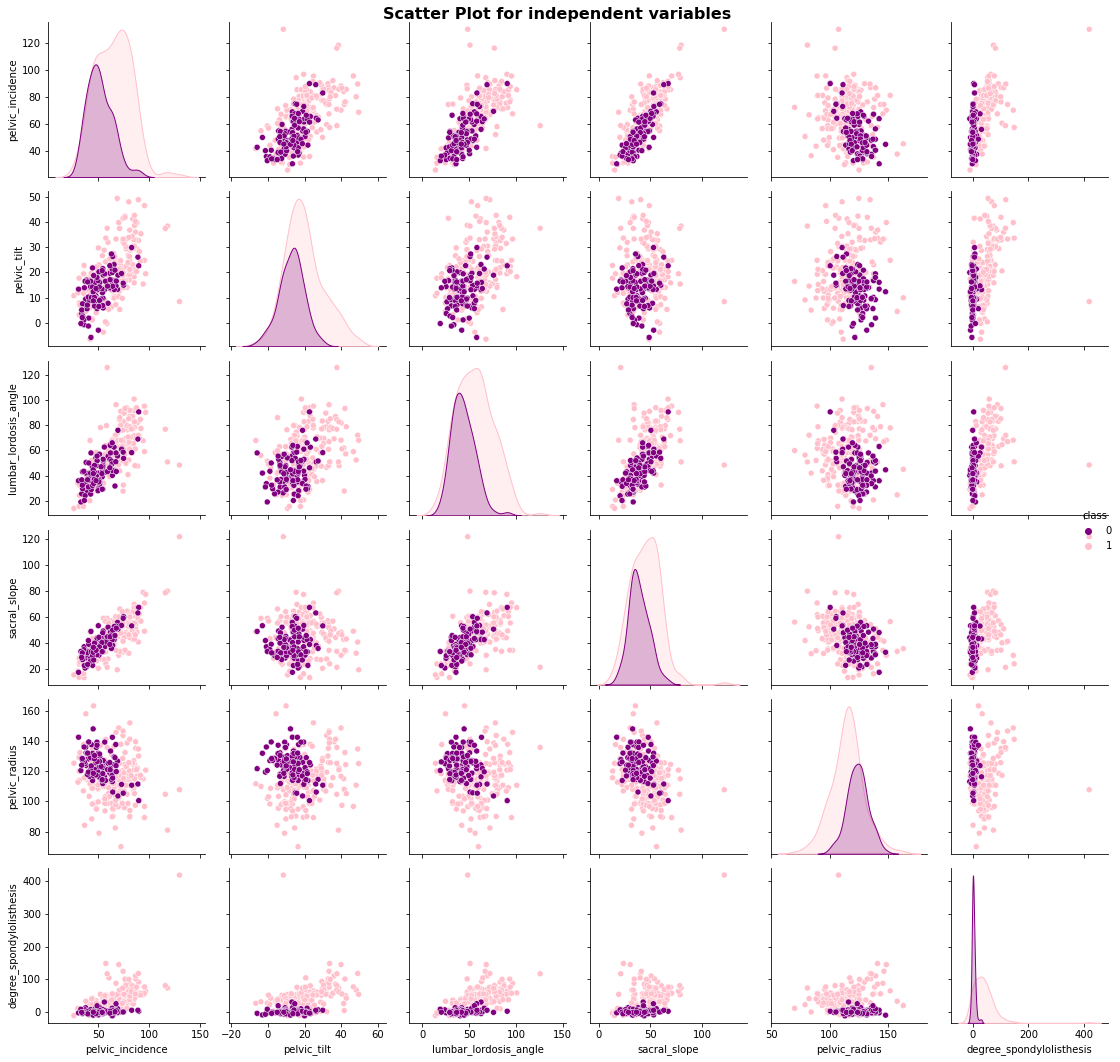

In [4]:
scatterplot = sns.pairplot(df, hue='class',  palette={0: 'purple', 1: 'pink'})
scatterplot.fig.suptitle('Scatter Plot for independent variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

ii.Make boxplots for each of the independent variables.

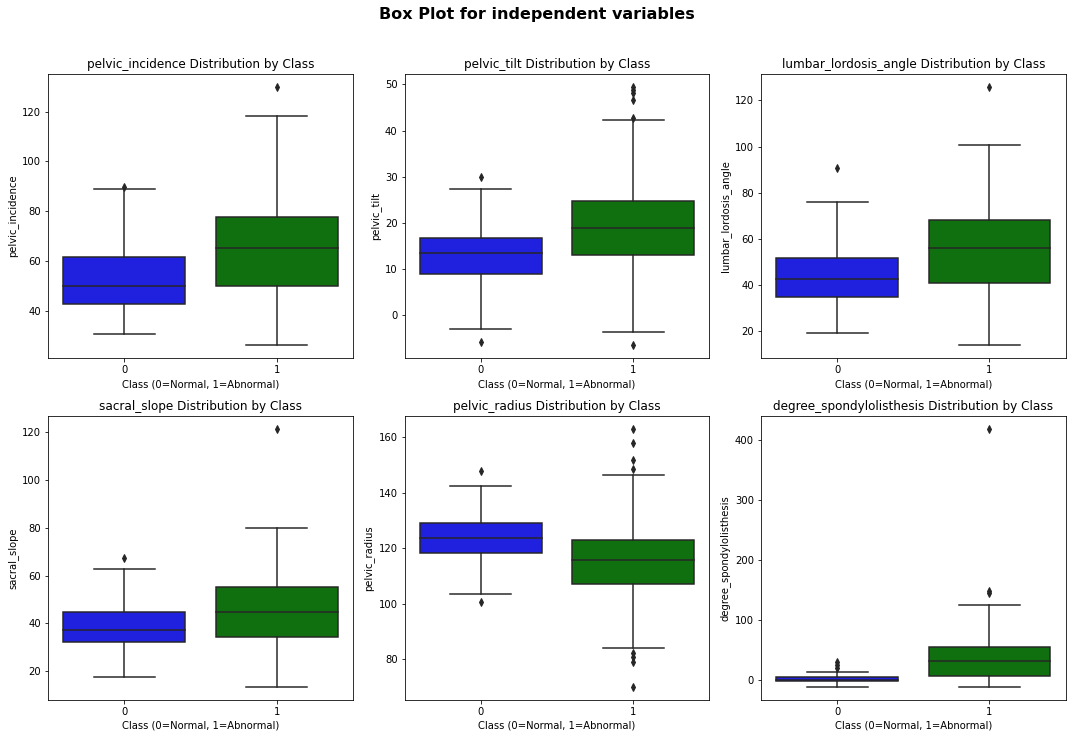

In [5]:
independent_variables = df.columns[:-1]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, v in enumerate(independent_variables):
    sns.boxplot(data=df, x='class', y=v, ax=axes[i], palette=['blue', 'green'])
    axes[i].set_title(f'{v} Distribution by Class')
    axes[i].set_xlabel('Class (0=Normal, 1=Abnormal)')

plt.suptitle('Box Plot for independent variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

iii.Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
print("Number of columns for class 0",df[df['class'] == 0].shape)
print("Number of columns for class 1",df[df['class'] == 1].shape)

Number of columns for class 0 (100, 7)
Number of columns for class 1 (210, 7)


In [7]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

train_class_0 = class_0.iloc[:70]
train_class_1 = class_1.iloc[:140]

test_class_0 = class_0.iloc[70:]
test_class_1 = class_1.iloc[140:]

train_set = pd.concat([train_class_0, train_class_1])
test_set = pd.concat([test_class_0, test_class_1])

X_train = train_set.drop(columns=['class'])
y_train = train_set['class']

X_test = test_set.drop(columns=['class'])
y_test = test_set['class']

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (210, 6)
Test set shape: (100, 6)


# (c) Classification using KNN on Vertebral Column Data Set

i.Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [8]:
#Referred https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
    
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Accuracy:", accuracy)

Train Accuracy: 0.8952380952380953
Test Accuracy: 0.92
Accuracy: 0.92


In [9]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

Confusion Matrix:
[[23  7]
 [ 1 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.91      0.99      0.95        70

    accuracy                           0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



ii.Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208,205, . . . ,7,4,1,}(in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k=k∗2.

k= 208 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 205 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 202 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 199 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 196 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 193 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 190 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 187 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 184 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 181 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 178 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 175 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 172 Train error: 0.33333333333333337 Test error: 0.30000000000000004
k= 169 Train error: 0.33333333333333337 Test error: 0.3000000000

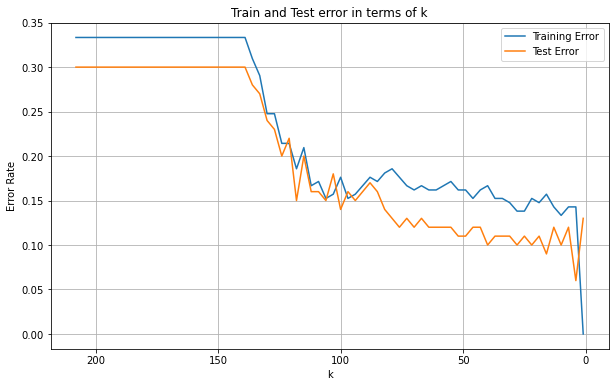

In [10]:
from sklearn.metrics import precision_score, f1_score

k_values = range(208, 0, -3)
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    train_error = 1 - knn.score(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print("k=",k,"Train error:",train_error,"Test error:",test_error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Train and Test error in terms of k')
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

In [11]:
k_star = k_values[np.argmin(test_errors)]
print("Optimal k (k*):",k_star)

knn_optimal = KNeighborsClassifier(n_neighbors=k_star, metric = 'euclidean')
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp) 
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMetrics for k*:")
print("Confusion Matrix:\n",conf_matrix)
print("True Positive Rate:",tpr)
print("True Negative Rate:",tnr)
print("Precision:",precision)
print("F1-Score:",f1)

Optimal k (k*): 4

Metrics for k*:
Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333333


iii.Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the
best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is
N ∈ {10,20,30, . . . ,210}.Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first
N−[N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5.For example, if N = 200, the optimal k is selected from {1,6,11, . . . ,196}.

N= 10 ,Best k= 1 ,Best Test error= 0.25
N= 20 ,Best k= 6 ,Best Test error= 0.19999999999999996
N= 30 ,Best k= 1 ,Best Test error= 0.21999999999999997
N= 40 ,Best k= 11 ,Best Test error= 0.25
N= 50 ,Best k= 26 ,Best Test error= 0.30000000000000004
N= 60 ,Best k= 21 ,Best Test error= 0.29000000000000004
N= 70 ,Best k= 26 ,Best Test error= 0.29000000000000004
N= 80 ,Best k= 31 ,Best Test error= 0.29000000000000004
N= 90 ,Best k= 41 ,Best Test error= 0.29000000000000004
N= 100 ,Best k= 6 ,Best Test error= 0.26
N= 110 ,Best k= 6 ,Best Test error= 0.21999999999999997
N= 120 ,Best k= 16 ,Best Test error= 0.17000000000000004
N= 130 ,Best k= 16 ,Best Test error= 0.16000000000000003
N= 140 ,Best k= 16 ,Best Test error= 0.15000000000000002
N= 150 ,Best k= 16 ,Best Test error= 0.13
N= 160 ,Best k= 6 ,Best Test error= 0.13
N= 170 ,Best k= 6 ,Best Test error= 0.13
N= 180 ,Best k= 6 ,Best Test error= 0.09999999999999998
N= 190 ,Best k= 6 ,Best Test error= 0.08999999999999997
N= 200 ,Best k= 6 ,Best T

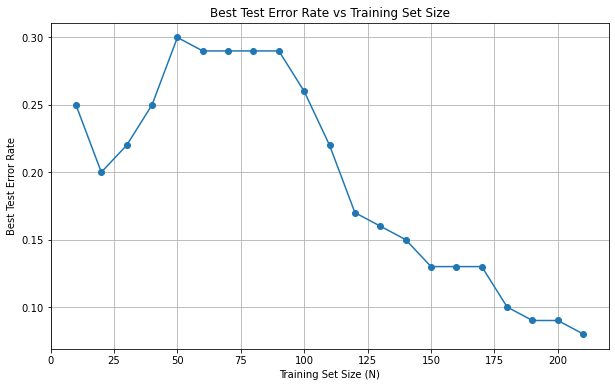

In [12]:
training_sizes = np.arange(10, 211, 10)
best_test_errors = []
optimal_ks = []

for N in training_sizes:
    n_class_0 = N // 3
    n_class_1 = N - n_class_0
    
    train_class_0 = class_0.iloc[:n_class_0]
    train_class_1 = class_1.iloc[:n_class_1]
    X_train = pd.concat([train_class_0, train_class_1]).drop('class', axis=1)
    y_train = pd.concat([train_class_0, train_class_1])['class']
        
    k_values = np.arange(1, N + 1, 5)
    best_test_error = float('inf')
    best_k = None
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_error = 1 - knn.score(X_test, y_test)
        
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
    
    best_test_errors.append(best_test_error)
    optimal_ks.append(best_k)
    print("N=",N,",Best k=",best_k,",Best Test error=",best_test_error)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Best Test Error Rate vs Training Set Size')
plt.grid(True)
plt.show()

# (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k=k∗) in a table. Use all of your training data and select the best k when {1,6,11, . . . ,196}.

i.Minkowski Distance:
A.which becomes Manhattan Distance with p = 1.

In [13]:
k_values = np.arange(1, 197, 5)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)
    results.append({'k': k, 'test_error': test_error})
    print("k=",k,"Test error=",test_error)

results_df = pd.DataFrame(results)

optimal_k = results_df.loc[results_df['test_error'].idxmin()]

print(f"\nOptimal k (k*) = {optimal_k['k']:.0f}")
print(f"Best test error = {optimal_k['test_error']:.4f}")

k= 1 Test error= 0.10999999999999999
k= 6 Test error= 0.10999999999999999
k= 11 Test error= 0.10999999999999999
k= 16 Test error= 0.12
k= 21 Test error= 0.12
k= 26 Test error= 0.10999999999999999
k= 31 Test error= 0.12
k= 36 Test error= 0.13
k= 41 Test error= 0.13
k= 46 Test error= 0.13
k= 51 Test error= 0.14
k= 56 Test error= 0.13
k= 61 Test error= 0.15000000000000002
k= 66 Test error= 0.15000000000000002
k= 71 Test error= 0.14
k= 76 Test error= 0.14
k= 81 Test error= 0.16000000000000003
k= 86 Test error= 0.15000000000000002
k= 91 Test error= 0.19999999999999996
k= 96 Test error= 0.19999999999999996
k= 101 Test error= 0.21999999999999997
k= 106 Test error= 0.20999999999999996
k= 111 Test error= 0.22999999999999998
k= 116 Test error= 0.20999999999999996
k= 121 Test error= 0.21999999999999997
k= 126 Test error= 0.24
k= 131 Test error= 0.28
k= 136 Test error= 0.28
k= 141 Test error= 0.30000000000000004
k= 146 Test error= 0.30000000000000004
k= 151 Test error= 0.30000000000000004
k= 156 T

k=1 gives the least error but it overfis the data so we use k=6

From the above table, Manhattan Distance has the best performance when k is in [6, 11, 26].

B.with log10(p) ∈ {0.1,0.2,0.3, . . . ,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [14]:
best_log_p = None
best_test_error_minkowski = float('inf')
k_best_manhattan = 6

print("\nResults for different p values:")
print("-" * 50)
print(f"{'k':>5} | {'p_value':>10} | {'log10(p)':>10} | {'Test Error':>10}")
print("-" * 50)

for log_p in np.arange(0.1, 1.1, 0.1):
    p_value = 10 ** log_p 
    knn = KNeighborsClassifier(n_neighbors=k_best_manhattan, metric='minkowski', p=p_value)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    if test_error < best_test_error_minkowski:
        best_test_error_minkowski = test_error
        best_log_p = log_p
        
    print(f"{k_best_manhattan:5d} | {p_value:10.2f} | {log_p:10.1f} | {test_error:10.4f}")

print("-" * 50)

print("Best log10(p) for Minkowski Distance:", best_log_p)
print("Best Test Error for Minkowski Distance with log10(p):", best_test_error_minkowski)


Results for different p values:
--------------------------------------------------
    k |    p_value |   log10(p) | Test Error
--------------------------------------------------
    6 |       1.26 |        0.1 |     0.0900
    6 |       1.58 |        0.2 |     0.0900
    6 |       2.00 |        0.3 |     0.0800
    6 |       2.51 |        0.4 |     0.0800
    6 |       3.16 |        0.5 |     0.0800
    6 |       3.98 |        0.6 |     0.0600
    6 |       5.01 |        0.7 |     0.0700
    6 |       6.31 |        0.8 |     0.0800
    6 |       7.94 |        0.9 |     0.0900
    6 |      10.00 |        1.0 |     0.0900
--------------------------------------------------
Best log10(p) for Minkowski Distance: 0.6
Best Test Error for Minkowski Distance with log10(p): 0.06000000000000005


C. which becomes Chebyshev Distance with p → ∞

In [15]:
k_values = np.arange(1, 197, 5)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    results.append({'k': k, 'test_error': test_error})
    print("k=",k,"Test error=",test_error)


results_df = pd.DataFrame(results)

optimal_k_chebyshev = results_df.loc[results_df['test_error'].idxmin()]

print(f"\nOptimal k (k*) for Chebyshev Distance: {optimal_k_chebyshev['k']:.0f}")
print(f"Best Test Error for Chebyshev Distance: {optimal_k_chebyshev['test_error']:.4f}")

k= 1 Test error= 0.13
k= 6 Test error= 0.09999999999999998
k= 11 Test error= 0.12
k= 16 Test error= 0.07999999999999996
k= 21 Test error= 0.10999999999999999
k= 26 Test error= 0.12
k= 31 Test error= 0.12
k= 36 Test error= 0.09999999999999998
k= 41 Test error= 0.13
k= 46 Test error= 0.12
k= 51 Test error= 0.12
k= 56 Test error= 0.12
k= 61 Test error= 0.14
k= 66 Test error= 0.13
k= 71 Test error= 0.14
k= 76 Test error= 0.10999999999999999
k= 81 Test error= 0.14
k= 86 Test error= 0.12
k= 91 Test error= 0.15000000000000002
k= 96 Test error= 0.14
k= 101 Test error= 0.18999999999999995
k= 106 Test error= 0.18000000000000005
k= 111 Test error= 0.18000000000000005
k= 116 Test error= 0.18000000000000005
k= 121 Test error= 0.20999999999999996
k= 126 Test error= 0.20999999999999996
k= 131 Test error= 0.25
k= 136 Test error= 0.28
k= 141 Test error= 0.30000000000000004
k= 146 Test error= 0.30000000000000004
k= 151 Test error= 0.30000000000000004
k= 156 Test error= 0.30000000000000004
k= 161 Test er

ii.Mahalanobis Distance.

In [16]:
#Referred Chatgpt for covariance matrix and inverse covariance matrix function
#"Prompt: Give the logic to apply covariance matrix and inverse covariance matrix in Mahalanobis" 
# Mahalanobis distance
def KNN(k_array, X_train, y_train, X_test, y_test, metric='mahalanobis'):
    train_e_d = []
    test_e_d = []
    results = []  
    best_error = float('inf')
    best_k = None
    
    cov_matrix = np.cov(X_train.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    for k in k_array:
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
        knn.fit(X_train, y_train)
        
        y_test_pred_mahalanobis = knn.predict(X_test)
        y_train_pred_mahalanobis = knn.predict(X_train)
        
        train_error = 1 - accuracy_score(y_train, y_train_pred_mahalanobis)
        test_error = 1 - accuracy_score(y_test, y_test_pred_mahalanobis)
        train_e_d.append(train_error)
        test_e_d.append(test_error)
        
        results.append((k, test_error))
        print("k=",k,"Test error=",test_error)
        
        if test_error < best_error:
            best_error = test_error
            best_k = k
    
    return results, best_k, best_error

k_array = np.arange(1, 200, 5)

results, best_k, best_error = KNN(k_array, X_train, y_train, X_test, y_test, metric='mahalanobis')

print("\nBest k and Best Test Error for Mahalanobis Distance:")
print(f"{'Best_k':>5} | {'Best Error':>10}")
print(f"{best_k:5d} | {best_error:10.4f}")

k= 1 Test error= 0.16000000000000003
k= 6 Test error= 0.14
k= 11 Test error= 0.17000000000000004
k= 16 Test error= 0.18000000000000005
k= 21 Test error= 0.19999999999999996
k= 26 Test error= 0.18999999999999995
k= 31 Test error= 0.18999999999999995
k= 36 Test error= 0.18000000000000005
k= 41 Test error= 0.20999999999999996
k= 46 Test error= 0.21999999999999997
k= 51 Test error= 0.20999999999999996
k= 56 Test error= 0.19999999999999996
k= 61 Test error= 0.24
k= 66 Test error= 0.21999999999999997
k= 71 Test error= 0.24
k= 76 Test error= 0.20999999999999996
k= 81 Test error= 0.21999999999999997
k= 86 Test error= 0.21999999999999997
k= 91 Test error= 0.22999999999999998
k= 96 Test error= 0.24
k= 101 Test error= 0.25
k= 106 Test error= 0.24
k= 111 Test error= 0.25
k= 116 Test error= 0.28
k= 121 Test error= 0.28
k= 126 Test error= 0.29000000000000004
k= 131 Test error= 0.30000000000000004
k= 136 Test error= 0.30000000000000004
k= 141 Test error= 0.30000000000000004
k= 146 Test error= 0.30000

# e)The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16, . . . ,196}.

In [17]:
def KNN_weighted_voting(k_array, X_train, y_train, X_test, y_test, metric, p=None):
    best_error, best_k = float('inf'), None
    for k in k_array:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p, weights='distance')
        knn.fit(X_train, y_train)
        test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
        if test_error < best_error:
            best_error, best_k = test_error, k  
    return best_k, best_error

k_array = np.arange(1, 200, 5)
metrics = {'Euclidean': ('minkowski', 2), 'Manhattan': ('minkowski', 1), 'Chebyshev': ('chebyshev', None)}

dic2 = {m: [KNN_weighted_voting(k_array, X_train, y_train, X_test, y_test, *params)] for m, params in metrics.items()}
res = [[m, k, error] for m, [(k, error)] in dic2.items()]

print("\nResults for Weighted Voting with Different Metrics:")
print("-" * 40)
print(f"{'Metric':<12} | {'Best_K':<8} | {'Error':<8}")
print("-" * 40)
for row in res:
    print(f"{row[0]:<12} | {row[1]:<8} | {row[2]:<8.4f}")
print("-" * 40)


Results for Weighted Voting with Different Metrics:
----------------------------------------
Metric       | Best_K   | Error   
----------------------------------------
Euclidean    | 6        | 0.1000  
Manhattan    | 26       | 0.1000  
Chebyshev    | 16       | 0.1100  
----------------------------------------


# (f)What is the lowest training error rate you achieved in this homework?

The lowest training error achieved in the homework is 0.0 when k=1.

Citations: Stack Overflow, Data Sciecne Stack exchange